In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import matplotlib.animation as animation
%matplotlib widget

### approximations

/home/mekise/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


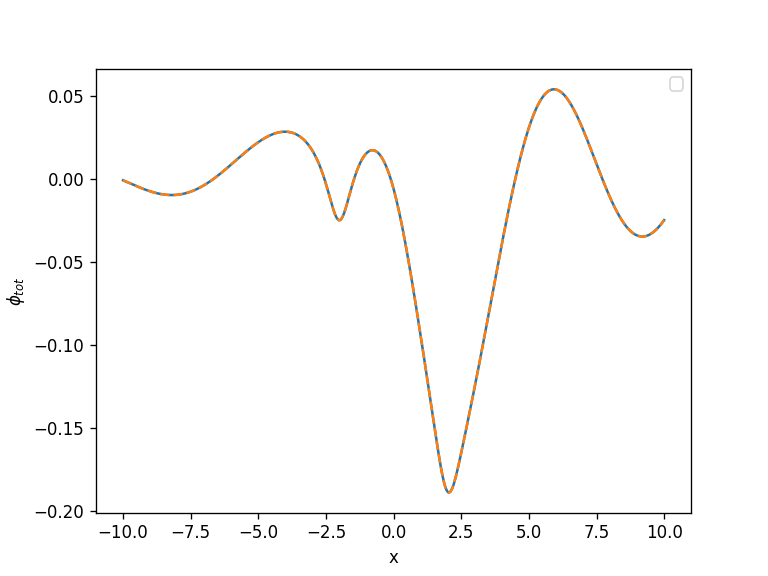

In [3]:
plt.figure(dpi=120)

filenpz = "../data/approximation.npz"
saveplot = "../data/approximation.png"

scattpos = np.load(filenpz)["scattpos"]
alphas = np.load(filenpz)["alphas"]
xx = np.load(filenpz)["xx"]
phitot = np.load(filenpz)["phitot"]
approxphitot = np.load(filenpz)["approxphitot"]

# for i in range(scattpos.shape[0]):
#     plt.axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
#     plt.axhline(-poweroverr["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
# plt.plot(poweroverr["r"], poweroverr["P"], label="implicit integral", color="C1")
plt.plot(xx, phitot)
plt.plot(xx, approxphitot, '--')

plt.xlabel("x")
plt.ylabel("$\phi_{tot}$")
plt.legend()